In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [ ]:
filter_columns = [1,2,3,4,6,7,8,9,10,11,13,15,17,19,21,23,25,27,29,31,33,35,38,40,42,44,49]

In [ ]:
ckdu_df = pd.read_csv('/content/CKDuSurvey_target.csv',encoding='unicode_escape', true_values=['TRUE'], false_values=['FALSE'], na_values=['Null', 'NaN'], usecols=filter_columns)

In [ ]:
ckdu_df.head()

,Occupation,SourceofWater,Age,Gender,MOH,BP,nHeight,nWeight,BMI,bCKD,...,bSnakeBite,bCKDu,bUTI,bCancer,bBA,bCKDFamily,bDMFamily,bHTNFamily,bCKDUFamily,GFRckd
0,NaN,NaN,44,M,COLOMBO M.C.,NaN,0.0,0.0,1.0,False,...,False,False,False,False,False,False,False,False,False,95.0
1,NaN,NaN,31,M,KEGALLE,NaN,0.0,0.0,1.0,False,...,False,False,False,False,False,False,False,False,False,116.0
2,NaN,NaN,31,M,KILINOCHCHI / KARACHCHI,NaN,0.0,0.0,1.0,False,...,False,False,False,False,False,False,False,False,False,NaN
3,NaN,NaN,48,F,MAHAWEWA,NaN,0.0,0.0,1.0,False,...,False,False,False,False,False,False,False,False,False,NaN
4,NaN,NaN,32,M,BORALESGAMUWA,NaN,0.0,0.0,1.0,False,...,False,False,False,False,False,False,False,False,False,NaN


In [ ]:
ckdu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1438 entries, 0 to 1437
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Occupation     480 non-null    object 
 1   SourceofWater  1203 non-null   object 
 2   Age            1438 non-null   int64  
 3   Gender         1438 non-null   object 
 4   MOH            1438 non-null   object 
 5   BP             1374 non-null   object 
 6   nHeight        1438 non-null   float64
 7   nWeight        1438 non-null   float64
 8   BMI            1438 non-null   float64
 9   bCKD           1438 non-null   bool   
 10  bDM            1438 non-null   bool   
 11  bHNT           1438 non-null   bool   
 12  bHDL           1438 non-null   bool   
 13  bRenalCalculi  1438 non-null   bool   
 14  bMalaria       1438 non-null   bool   
 15  bDengue        1438 non-null   bool   
 16  bLepto         1438 non-null   bool   
 17  bSnakeBite     1438 non-null   bool   
 18  bCKDu   

In [ ]:
# converting target value to 0 and 1 for classification
# GRF values lower than 90 are considered risky

ckdu_df['target'] = (ckdu_df['GFRckd'] <= 95).astype(int)

In [ ]:
ckdu_df.tail(100)

,Occupation,SourceofWater,Age,Gender,MOH,BP,nHeight,nWeight,BMI,bCKD,...,bCKDu,bUTI,bCancer,bBA,bCKDFamily,bDMFamily,bHTNFamily,bCKDUFamily,GFRckd,target
1338,NaN,Tap Water,56,M,PILIYANDALA - KESBAWA,134/79,1.72,70.0,23.66,False,...,False,False,False,False,False,False,False,False,110.0,0
1339,NaN,Well Water,45,F,MAHAWEWA,151/97,1.59,82.0,32.44,False,...,False,False,False,False,False,False,False,False,108.0,0
1340,NaN,NaN,30,M,COLOMBO M.C.,NaN,0.00,0.0,1.00,False,...,False,False,False,False,False,False,False,False,NaN,0
1341,NaN,Tap Water/Well Water,42,M,PILIYANDALA - KESBAWA,120/80,1.70,74.0,25.61,False,...,False,False,False,False,False,False,False,False,NaN,0
1342,NaN,Tap Water,48,F,PILIYANDALA - KESBAWA,NaN,1.51,52.0,22.81,True,...,False,False,False,False,False,False,True,False,92.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1433,Goverment Servants,RO Filter/Tap Water,40,M,KATTANKUDY,NaN,1.74,74.0,24.44,False,...,False,False,False,False,False,True,False,False,119.0,0
1434,NaN,NaN,32,M,COLOMBO M.C.,NaN,0.00,0.0,1.00,False,...,False,False,False,False,False,False,False,False,114.0,0
1435,NaN,NaN,30,F,COLOMBO M.C.,NaN,0.00,0.0,1.00,False,...,False,False,False,False,False,False,False,False,115.0,0
1436,NaN,NaN,55,M,COLOMBO M.C.,NaN,0.00,0.0,1.00,False,...,False,False,False,False,False,False,False,False,96.0,0


In [ ]:
ckdu_df.value_counts('target')

target
0    940
1    498
Name: count, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

# convert categorial data to numerical values with imputer

ckdu_df['Occupation'] = encoder.fit_transform(ckdu_df['Occupation'])
ckdu_df['SourceofWater'] = encoder.fit_transform(ckdu_df['SourceofWater'])
ckdu_df['Gender'] = encoder.fit_transform(ckdu_df['Gender'])
ckdu_df['MOH'] = encoder.fit_transform(ckdu_df['MOH'])

In [ ]:
# handle the BP values
# Split the BP column into two new columns
ckdu_df[['BP_systolic', 'BP_diastolic']] = ckdu_df['BP'].str.split('/', expand=True, n=1)

# Convert the new columns to numeric data type
ckdu_df['BP_systolic'] = pd.to_numeric(ckdu_df['BP_systolic'], errors='coerce')
ckdu_df['BP_diastolic'] = pd.to_numeric(ckdu_df['BP_diastolic'], errors='coerce')

# Impute missing values with mean
ckdu_df['BP_systolic'] = ckdu_df['BP_systolic'].fillna(ckdu_df['BP_systolic'].mean())
ckdu_df['BP_diastolic'] = ckdu_df['BP_diastolic'].fillna(ckdu_df['BP_diastolic'].mean())

ckdu_df = ckdu_df.drop('BP', axis=1)

In [ ]:
ckdu_df

,Occupation,SourceofWater,Age,Gender,MOH,nHeight,nWeight,BMI,bCKD,bDM,...,bCancer,bBA,bCKDFamily,bDMFamily,bHTNFamily,bCKDUFamily,GFRckd,target,BP_systolic,BP_diastolic
0,8,11,44,1,16,0.00,0.0,1.00,False,False,...,False,False,False,False,False,False,95.0,1,127.186157,85.620991
1,8,11,31,1,47,0.00,0.0,1.00,False,False,...,False,False,False,False,False,False,116.0,0,127.186157,85.620991
2,8,11,31,1,49,0.00,0.0,1.00,False,False,...,False,False,False,False,False,False,NaN,0,127.186157,85.620991
3,8,11,48,0,56,0.00,0.0,1.00,False,False,...,False,False,False,False,False,False,NaN,0,127.186157,85.620991
4,8,11,32,1,13,0.00,0.0,1.00,False,False,...,False,False,False,False,False,False,NaN,0,127.186157,85.620991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1433,2,1,40,1,45,1.74,74.0,24.44,False,True,...,False,False,False,True,False,False,119.0,0,127.186157,85.620991
1434,8,11,32,1,16,0.00,0.0,1.00,False,False,...,False,False,False,False,False,False,114.0,0,127.186157,85.620991
1435,8,11,30,0,16,0.00,0.0,1.00,False,False,...,False,False,False,False,False,False,115.0,0,127.186157,85.620991
1436,8,11,55,1,16,0.00,0.0,1.00,False,False,...,False,False,False,False,False,False,96.0,0,127.186157,85.620991


In [ ]:
from sklearn.impute import KNNImputer

# Instantiate and fit the imputer
imputer = KNNImputer()
data_imputed = imputer.fit_transform(ckdu_df)

# Convert the imputed data back to a pandas DataFrame
data = pd.DataFrame(data_imputed, columns=ckdu_df.columns)

In [ ]:
# Drop rows where 'GFRckd' has null values
ckdu_df = ckdu_df[ckdu_df['GFRckd'].notna()]
ckdu_df = ckdu_df.drop('GFRckd', axis=1)
ckdu_df = ckdu_df.drop('nHeight', axis=1)
ckdu_df = ckdu_df.drop('nWeight', axis=1)

In [ ]:
ckdu_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1375 entries, 0 to 1437
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Occupation     1375 non-null   int64  
 1   SourceofWater  1375 non-null   int64  
 2   Age            1375 non-null   int64  
 3   Gender         1375 non-null   int64  
 4   MOH            1375 non-null   int64  
 5   BMI            1375 non-null   float64
 6   bCKD           1375 non-null   bool   
 7   bDM            1375 non-null   bool   
 8   bHNT           1375 non-null   bool   
 9   bHDL           1375 non-null   bool   
 10  bRenalCalculi  1375 non-null   bool   
 11  bMalaria       1375 non-null   bool   
 12  bDengue        1375 non-null   bool   
 13  bLepto         1375 non-null   bool   
 14  bSnakeBite     1375 non-null   bool   
 15  bCKDu          1375 non-null   bool   
 16  bUTI           1375 non-null   bool   
 17  bCancer        1375 non-null   bool   
 18  bBA          

In [ ]:
ckdu_df.value_counts('target')

target
0    877
1    498
Name: count, dtype: int64

In [ ]:
ckdu_df.groupby('target').mean()

,Occupation,SourceofWater,Age,Gender,MOH,BMI,bCKD,bDM,bHNT,bHDL,...,bCKDu,bUTI,bCancer,bBA,bCKDFamily,bDMFamily,bHTNFamily,bCKDUFamily,BP_systolic,BP_diastolic
target,,,,,,,,,,,,,,,,,,,,,
0,5.925884,5.559863,42.110604,0.346636,42.786773,24.929612,0.003421,0.116306,0.096921,0.093501,...,0.00114,0.006842,0.00000,0.015964,0.029647,0.264538,0.230331,0.001140,124.708047,80.493582
1,6.516064,5.216867,55.777108,0.355422,37.670683,24.106024,0.108434,0.395582,0.341365,0.355422,...,0.10241,0.084337,0.03012,0.066265,0.142570,0.297189,0.299197,0.114458,131.919497,95.499321


In [ ]:
 # seperate data and outcome
 X = ckdu_df.drop(columns='target', axis=1)
 Y = ckdu_df['target']

In [ ]:
scaler = StandardScaler()
standardized_data = scaler.fit_transform(X)

In [ ]:
print(standardized_data)

[[ 6.91114474e-01  1.61010099e+00 -2.12691673e-01 ... -2.09855864e-01
  -3.07725715e-03 -1.57150532e-03]
 [ 6.91114474e-01  1.61010099e+00 -1.11617638e+00 ... -2.09855864e-01
  -3.07725715e-03 -1.57150532e-03]
 [ 6.91114474e-01  1.61010099e+00  1.17728480e+00 ... -2.09855864e-01
  -3.07725715e-03 -1.57150532e-03]
 ...
 [ 6.91114474e-01  1.61010099e+00 -1.18567521e+00 ... -2.09855864e-01
  -3.07725715e-03 -1.57150532e-03]
 [ 6.91114474e-01  1.61010099e+00  5.51795389e-01 ... -2.09855864e-01
  -3.07725715e-03 -1.57150532e-03]
 [ 6.91114474e-01  1.61010099e+00 -2.12691673e-01 ... -2.09855864e-01
   8.46727444e-02 -1.49708060e-02]]


In [ ]:
X = standardized_data
Y = ckdu_df['target']

In [ ]:
#split data into training and testing

X_train, X_test, Y_train, Y_test = S(X,Y,test_size=0.2,stratify=Y, random_state=2)
print(X_train.shape,X_test.shape)

(1100, 25) (275, 25)


In [ ]:
# Train the model with probability estimates
classifier = svm.SVC(kernel='linear', probability=True)
classifier.fit(X_train, Y_train)

SVC(kernel='linear', probability=True)

In [ ]:
# Evaluation of the model

# Finding the accuracy score
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

# Predict probabilities for test data
X_test_probabilities = classifier.predict_proba(X_test)

# Extract the probability of class 1 (CKD)
ckd_risk_scores = X_test_probabilities[:, 1]
# print("CKD Risk Scores: ", ckd_risk_scores)
print(X_train[0])


[-1.53785129  0.74202275  0.34329892  1.34202772 -0.23588271  0.00740988
 -0.20795996 -0.52714423  2.09574733 -0.48174563 -0.31622777 -0.25183011
 -0.38188131 -0.27243118 -0.30780712 -0.1982539  -0.1901889  -0.10502101
 -0.18812646 -0.27549926 -0.61798831 -0.58546856 -0.20985586 -0.07638529
 -0.10187995]


In [ ]:
print('accuracy for train data: ' , training_data_accuracy*100 , '%')

accuracy for train data:  88.18181818181819 %


In [ ]:
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('accuracy for test data', test_data_accuracy*100 , '%')

accuracy for test data 88.0 %


##Confution Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cf_matrix = confusion_matrix(Y_test, X_test_prediction)
print(cf_matrix)

[[169   6]
 [ 27  73]]


In [ ]:
tn, fp, fn, tp = cf_matrix.ravel()
print(tn, fp, fn, tp)

169 6 27 73


<Axes: >

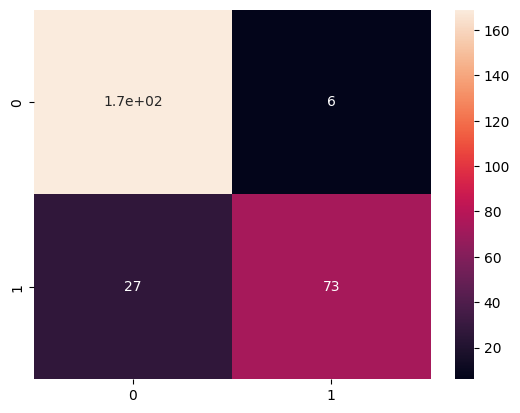

In [ ]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

##Precision

precison = true positive/ total predicted positives

In [ ]:
from sklearn.metrics import precision_score

In [ ]:
# precision score for training data
precision_train = precision_score(Y_train, X_train_prediction)
print('training data precision - ', precision_train)

training data precision -  0.8743016759776536


In [ ]:
# testing data precision
precision_test = precision_score(Y_test, X_test_prediction)
print('testing data precision - ', precision_test)

testing data precision -  0.9240506329113924


##Recall
recall = true positive/ actual positive

In [ ]:
from sklearn.metrics import recall_score

In [ ]:
# recall score for training data
recall_train = recall_score(Y_train, X_train_prediction)
print('training data recall score - ', recall_train)

training data recall score -  0.7864321608040201


In [ ]:
# testing data recall score
recall_test = recall_score(Y_test, X_test_prediction)
print('training data recall score - ', recall_test)

training data recall score -  0.73


## f1 Score
f1 score = precision x recall / precision + recall

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
# f1 score for training data
f1_train = f1_score(Y_train, X_train_prediction)
print('training data f1 score - ', f1_train)

training data f1 score -  0.828042328042328


In [ ]:
# testing data f1 score
f1_test = f1_score(Y_test, X_test_prediction)
print('training data f1 score - ', f1_test)

training data f1 score -  0.8156424581005587


#Creating test Instance for testing the model

In [ ]:
# Create a new instance with the required features
new_instance = [0, 1, 45, 1, 1, 25.6, False, False, True, False, False, True, False, False, False, False, False, False, True, False, True, True, False, 120, 80]

# Convert the instance to a numpy array
new_instance = np.array(new_instance).reshape(1, -1)

# Standardize the new instance
new_instance_standardized = scaler.transform(new_instance)

# Predict the target value for the new instance
prediction = classifier.predict(new_instance_standardized)

print("Predicted target value:", prediction[0])

Predicted target value: 1


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


##saving the model

In [ ]:
import pickle

filename = 'ckdu_clas.sav'
pickle.dump(classifier, open(filename, 'wb'))

pickle.dump(scaler, open('scaler.pkl', 'wb'))

# loading the saved model
loaded_model = pickle.load(open('ckdu_clas.sav', 'rb'))

## testing the exported model with the created instance

In [ ]:
test_1 = loaded_model.predict_proba(new_instance_standardized)[0, 1]
print("probability of having CKD/CKDu :",test_1)

probability of having CKD/CKDu : 0.644974410468376
